# UNDERSTANDING THE SYMBIOSIS OF SLEEP AND STEPS: A MULTIFACETED ANALYSIS

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
daily_activity = pd.read_csv('D:/fitbit/fitbitall/dailyActivity_merged.csv')
sleep_day = pd.read_csv('D:/fitbit/fitbitall/sleepDay_merged.csv')

In [11]:
sleep_day[['Sleep_Date', 'Sleep_Time']] = sleep_day['SleepDay'].str.split(' ', n=1, expand=True)

sleep_day['Sleep_Date'] = pd.to_datetime(sleep_day['Sleep_Date'], format='%m/%d/%Y')

sleep_day.drop(columns=['SleepDay'], inplace=True)



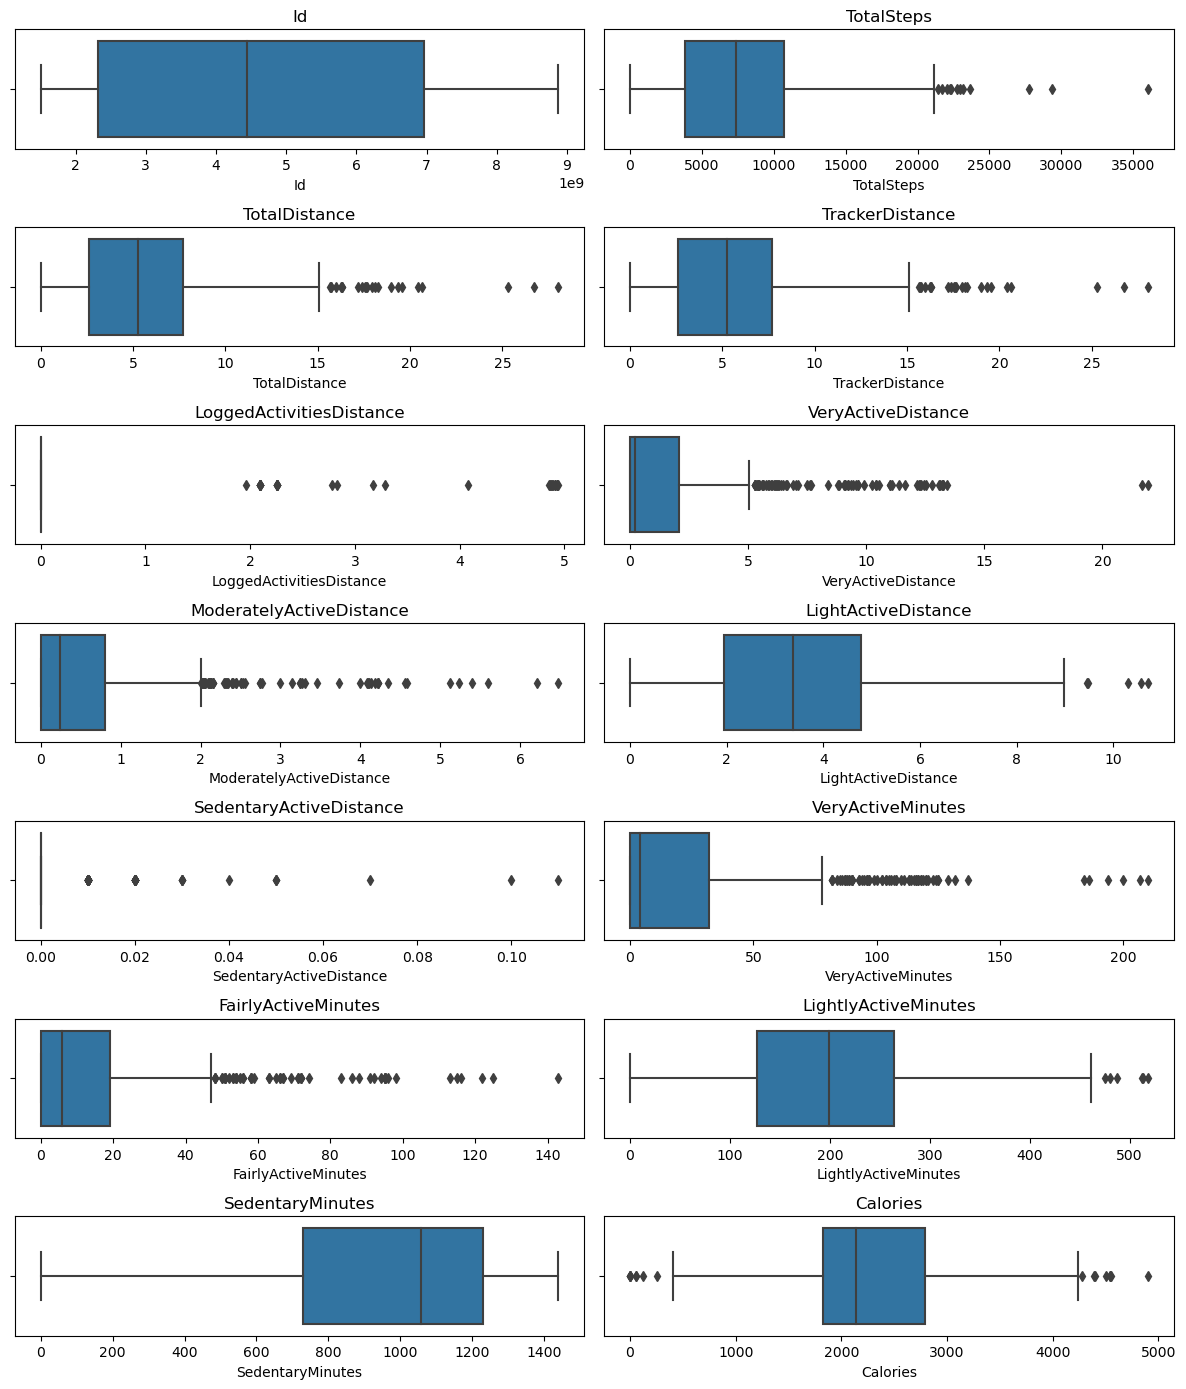

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


numerical_columns = daily_activity.select_dtypes(include=[np.number]).columns


fig, axes = plt.subplots(nrows=len(numerical_columns)//2, ncols=2, figsize=(12, 2 * len(numerical_columns)//2))

axes = axes.flatten()


for i, column in enumerate(numerical_columns):
    sns.boxplot(x=daily_activity[column], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

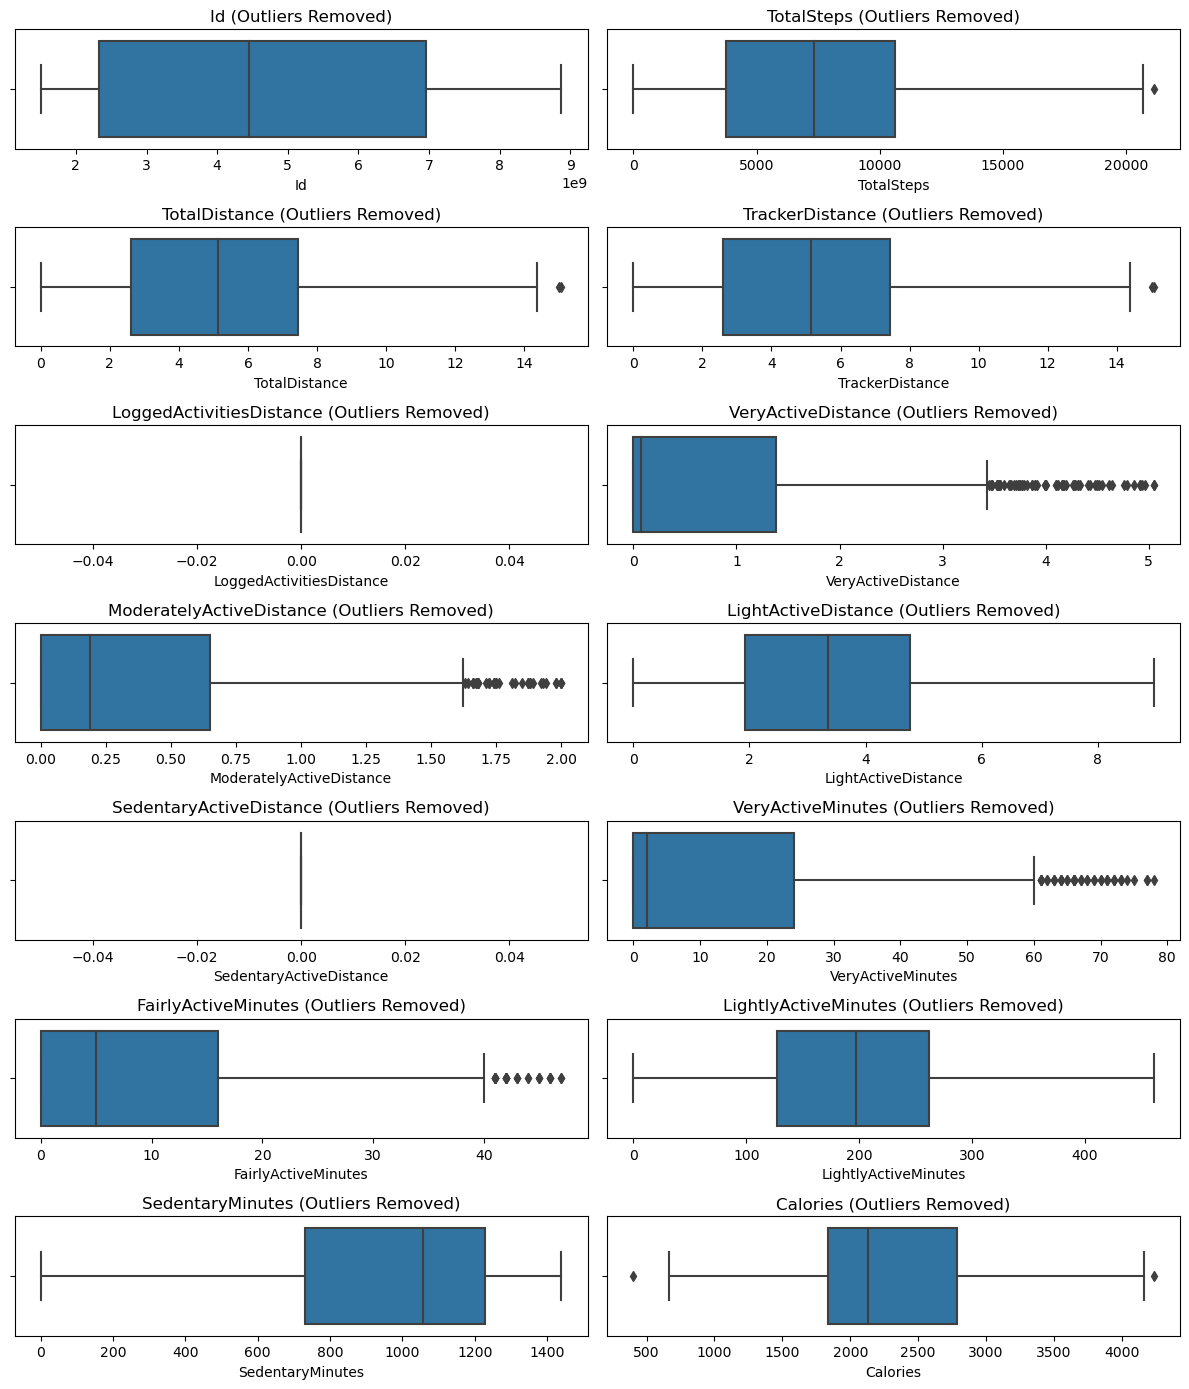

In [16]:

numerical_columns = daily_activity.select_dtypes(include=[np.number]).columns


fig, axes = plt.subplots(nrows=len(numerical_columns)//2, ncols=2, figsize=(12, 2 * len(numerical_columns)//2))

axes = axes.flatten()


for i, column in enumerate(numerical_columns):

    Q1 = daily_activity[column].quantile(0.25)
    Q3 = daily_activity[column].quantile(0.75)
    IQR = Q3 - Q1


    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    
    daily_activity_no_outliers = daily_activity[(daily_activity[column] >= lower_bound) & (daily_activity[column] <= upper_bound)]

    sns.boxplot(x=daily_activity_no_outliers[column], ax=axes[i])
    axes[i].set_title(f"{column} (Outliers Removed)")

plt.tight_layout()
plt.show()

sleep

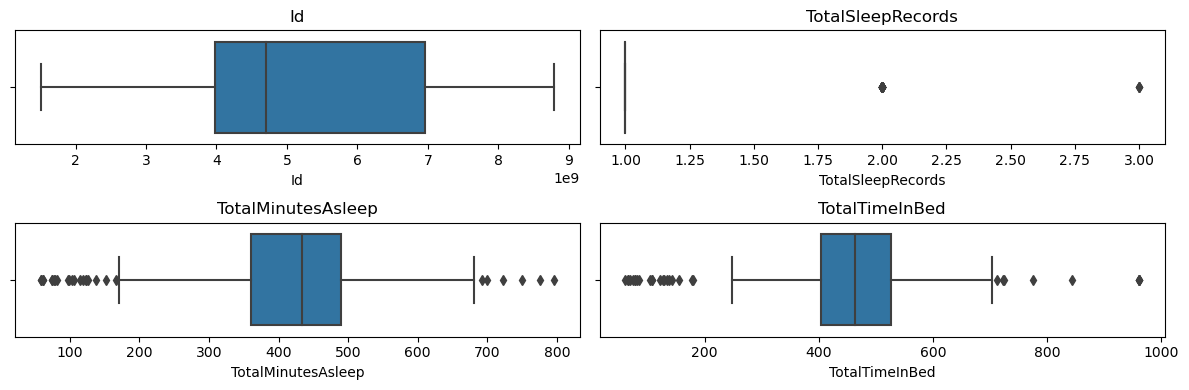

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = sleep_day.select_dtypes(include=[np.number]).columns

fig, axes = plt.subplots(nrows=len(numerical_columns)//2, ncols=2, figsize=(12, 2 * len(numerical_columns)//2))

axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    sns.boxplot(x=sleep_day[column], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

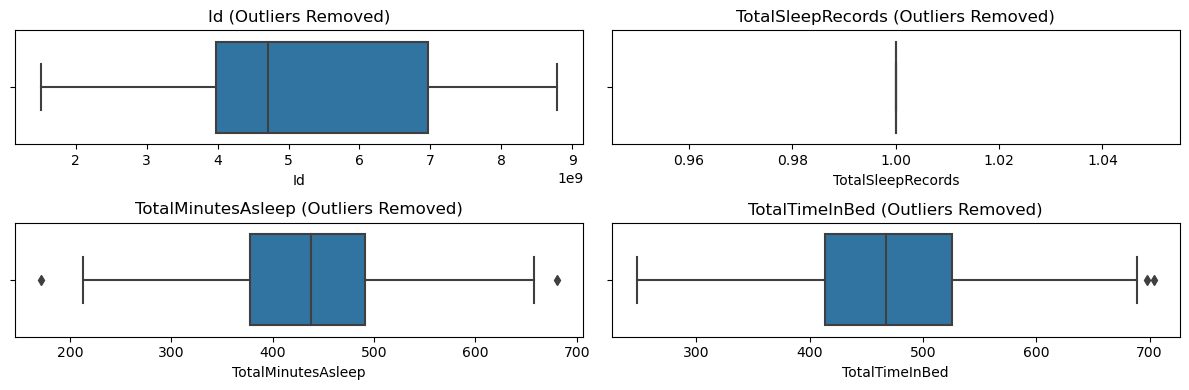

In [19]:

numerical_columns = sleep_day.select_dtypes(include=[np.number]).columns

fig, axes = plt.subplots(nrows=len(numerical_columns)//2, ncols=2, figsize=(12, 2 * len(numerical_columns)//2))

axes = axes.flatten()

for i, column in enumerate(numerical_columns):

    Q1 = sleep_day[column].quantile(0.25)
    Q3 = sleep_day[column].quantile(0.75)
    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    sleep_day_no_outliers = sleep_day[(sleep_day[column] >= lower_bound) & (sleep_day[column] <= upper_bound)]

    sns.boxplot(x=sleep_day_no_outliers[column], ax=axes[i])
    axes[i].set_title(f"{column} (Outliers Removed)")


plt.tight_layout()
plt.show()

In [22]:
 sleep_day_no_outliers.rename(columns={'Sleep_Date':'ActivityDate'}, inplace = True)

C:\Users\srini\AppData\Local\Temp\ipykernel_16964\2702164889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_day_no_outliers.rename(columns={'Sleep_Date':'ActivityDate'}, inplace = True)


In [23]:
 sleep_day_no_outliers

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActivityDate,Sleep_Time
0,1503960366,1,327,346,2016-04-12,12:00:00 AM
1,1503960366,2,384,407,2016-04-13,12:00:00 AM
2,1503960366,1,412,442,2016-04-15,12:00:00 AM
3,1503960366,2,340,367,2016-04-16,12:00:00 AM
5,1503960366,1,304,320,2016-04-19,12:00:00 AM
...,...,...,...,...,...,...
408,8792009665,1,343,360,2016-04-30,12:00:00 AM
409,8792009665,1,503,527,2016-05-01,12:00:00 AM
410,8792009665,1,415,423,2016-05-02,12:00:00 AM
411,8792009665,1,516,545,2016-05-03,12:00:00 AM


In [24]:
 sleep_day_no_outliers.shape

(383, 6)

In [25]:
daily_activity_no_outliers.shape

(924, 15)

In [27]:
daily_activity_no_outliers['ActivityDate'] = pd.to_datetime(daily_activity_no_outliers['ActivityDate'])
daily_activity_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 924 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        924 non-null    int64         
 1   ActivityDate              924 non-null    datetime64[ns]
 2   TotalSteps                924 non-null    int64         
 3   TotalDistance             924 non-null    float64       
 4   TrackerDistance           924 non-null    float64       
 5   LoggedActivitiesDistance  924 non-null    float64       
 6   VeryActiveDistance        924 non-null    float64       
 7   ModeratelyActiveDistance  924 non-null    float64       
 8   LightActiveDistance       924 non-null    float64       
 9   SedentaryActiveDistance   924 non-null    float64       
 10  VeryActiveMinutes         924 non-null    int64         
 11  FairlyActiveMinutes       924 non-null    int64         
 12  LightlyActiveMinutes      9

C:\Users\srini\AppData\Local\Temp\ipykernel_16964\1046500449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_activity_no_outliers['ActivityDate'] = pd.to_datetime(daily_activity_no_outliers['ActivityDate'])


In [32]:
inner_daily_act= pd.merge(daily_activity_no_outliers, sleep_day_no_outliers, on=['Id','ActivityDate'], how='inner')
inner_daily_act.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Sleep_Time
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,327,346,12:00:00 AM
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,384,407,12:00:00 AM
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1,412,442,12:00:00 AM
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2,340,367,12:00:00 AM
4,1503960366,2016-04-19,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035,1,304,320,12:00:00 AM


In [35]:
newfb = inner_daily_act
newfb.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Sleep_Time
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,327,346,12:00:00 AM
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,384,407,12:00:00 AM
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1,412,442,12:00:00 AM
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2,340,367,12:00:00 AM
4,1503960366,2016-04-19,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035,1,304,320,12:00:00 AM


In [36]:
FitBit.shape

(376, 19)

In [37]:
import pandas as pd


bins = [0, 5000, 10000, 15000, 20000, float('inf')]
labels = ['<5k', '5k-10k', '10k-15k', '15k-20k', '20k+']
newfb['TotalStepsCategory'] = pd.cut(newfb['TotalSteps'], bins=bins, labels=labels)


summary_stats = newfb.groupby('TotalStepsCategory')['TotalMinutesAsleep'].agg(['mean', 'median', 'std', 'min', 'max'])

print(summary_stats)


                          mean  median         std  min  max
TotalStepsCategory                                          
<5k                 466.974684   463.0   81.254108  235  681
5k-10k              436.218310   434.0   78.607303  253  651
10k-15k             406.036765   420.5   86.718652  152  611
15k-20k             396.375000   386.5   95.334411  230  550
20k+                443.666667   472.0  101.510262  331  528


# is there is a statistically significant association between steps and sleep.?

In [38]:
#coorealtion  analysis
from scipy.stats import pearsonr

correlation, p_value = pearsonr(newfb['TotalSteps'], newfb['TotalMinutesAsleep'])

print("Pearson Correlation Coefficient:", correlation)
print("P-Value:", p_value)

if p_value < 0.05:  
    print("There is a statistically significant association between steps and sleep.")
else:
    print("There is no statistically significant association between steps and sleep.")





Pearson Correlation Coefficient: -0.27601004226346537
P-Value: 5.320594152894951e-08
There is a statistically significant association between steps and sleep.


In [39]:

newfb['day_of_the_week'] = pd.to_datetime(newfb['ActivityDate']).dt.day_name()
average_data_by_day = newfb.groupby('day_of_the_week')[['TotalSteps', 'TotalMinutesAsleep']].mean().reset_index()


weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_data_by_day['day_of_the_week'] = pd.Categorical(average_data_by_day['day_of_the_week'], categories=weekdays, ordered=True)
average_data_by_day = average_data_by_day.sort_values('day_of_the_week')


print(average_data_by_day)


  day_of_the_week    TotalSteps  TotalMinutesAsleep
1          Monday   9408.818182          425.636364
5         Tuesday   9318.238095          403.841270
6       Wednesday   8022.863636          434.681818
4        Thursday   8256.254237          422.355932
0          Friday   8052.153846          422.826923
2        Saturday  10350.106383          433.063830
3          Sunday   7181.733333          480.200000


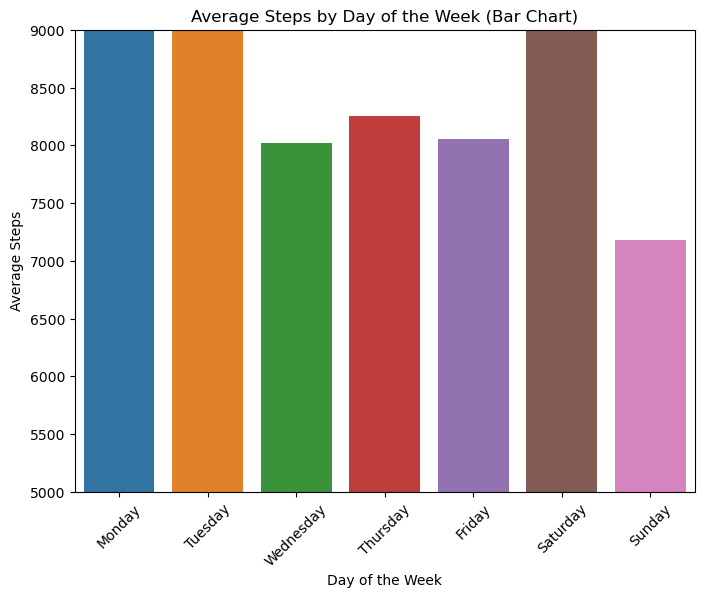

In [40]:
plt.figure(figsize=(8, 6))
sns.barplot(data=average_data_by_day, x='day_of_the_week', y='TotalSteps', order=weekdays )
plt.xlabel('Day of the Week')
plt.ylabel('Average Steps')
plt.ylim(5000, 9000) 
plt.title('Average Steps by Day of the Week (Bar Chart)')
plt.xticks(rotation=45)
plt.show()

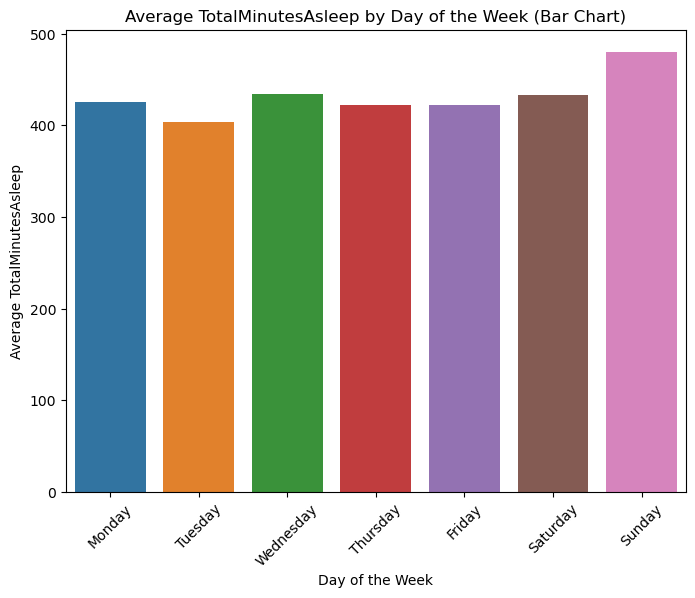

In [41]:

plt.figure(figsize=(8, 6))
sns.barplot(data=average_data_by_day, x='day_of_the_week', y='TotalMinutesAsleep', order=weekdays)
plt.xlabel('Day of the Week')
plt.ylabel('Average TotalMinutesAsleep')
plt.title('Average TotalMinutesAsleep by Day of the Week (Bar Chart)')
plt.xticks(rotation=45)
plt.show()


# K-Means

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


           TotalSteps  TotalMinutesAsleep
Cluster                                  
0         4026.040984          462.393443
1        13725.977528          383.516854
2         9292.248485          431.412121


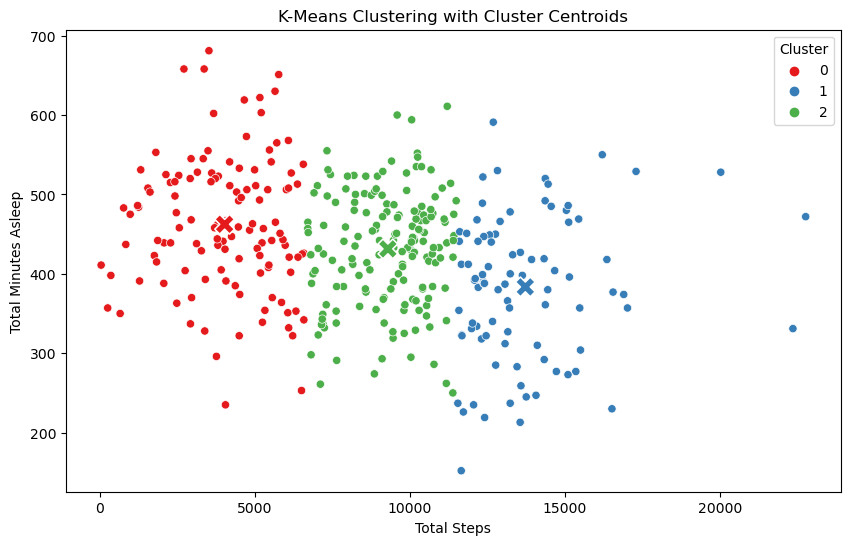

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


num_clusters = 3


kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(newfb[['TotalSteps', 'TotalMinutesAsleep']])


newfb['Cluster'] = kmeans.labels_


cluster_centroids = newfb.groupby('Cluster')[['TotalSteps', 'TotalMinutesAsleep']].mean()

print(cluster_centroids)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalSteps', y='TotalMinutesAsleep', hue='Cluster', data=newfb, palette='Set1')
sns.scatterplot(x=cluster_centroids['TotalSteps'], y=cluster_centroids['TotalMinutesAsleep'], hue=cluster_centroids.index, s=200, marker='X', palette='Set1', legend=False)

plt.xlabel('Total Steps')
plt.ylabel('Total Minutes Asleep')
plt.title('K-Means Clustering with Cluster Centroids')

plt.show()


Text(0.5, 1.0, 'Total Steps vs Total Minutes Asleep')

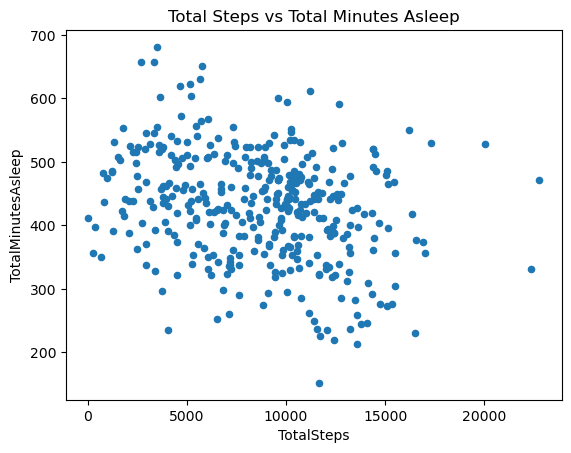

In [43]:
scatter = newfb.plot(x='TotalSteps', y='TotalMinutesAsleep', kind='scatter')
scatter.set_title('Total Steps vs Total Minutes Asleep')


AVG SLEEP STEPS:

In [45]:
print(newfb[['TotalMinutesAsleep','TotalTimeInBed']].mean())
print("Ratio Between Average Sleep time and Average Total time in bed: "+
     str(newfb['TotalMinutesAsleep'].mean()/newfb['TotalTimeInBed'].mean()))

TotalMinutesAsleep    430.127660
TotalTimeInBed        468.550532
dtype: float64
Ratio Between Average Sleep time and Average Total time in bed: 0.917996310486732


# Regression

In [46]:
import statsmodels.api as sm

# Assuming you have a DataFrame 'data' containing your dataset
X = newfb['TotalSteps'] # Independent variable
y = newfb[['TotalMinutesAsleep']] # Dependent variable

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Create and fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     TotalMinutesAsleep   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     30.84
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           5.32e-08
Time:                        11:41:22   Log-Likelihood:                -2192.6
No. Observations:                 376   AIC:                             4389.
Df Residuals:                     374   BIC:                             4397.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        481.3173     10.156     47.391      0.0

# Hierarchical Clustering

          TotalSteps  TotalMinutesAsleep
Cluster                                 
0        8920.189394          409.681818
1        8156.092437          436.411765
2        8783.760000          445.736000


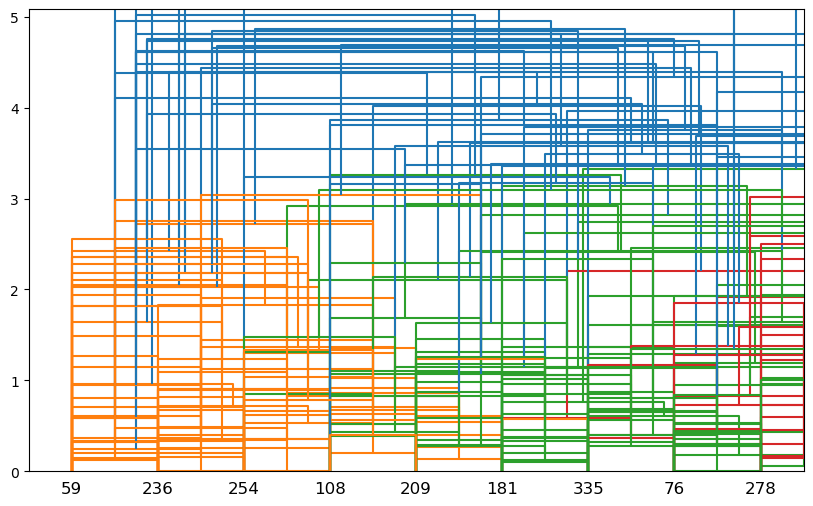

In [47]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


days = newfb['ActivityDate'].unique()


clustered_data = pd.DataFrame()

num_clusters = 3

plt.figure(figsize=(10, 6))  

for day in days:
    
    subset = newfb[newfb['ActivityDate'] == day][['TotalSteps', 'TotalMinutesAsleep']]
  
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(subset)
    

    linkage_matrix = linkage(scaled_data, method='ward')
    
    dendrogram(linkage_matrix, labels=subset.index, orientation='top')
    

    subset['Cluster'] = pd.cut(range(len(linkage_matrix) + 1), bins=num_clusters, labels=range(num_clusters))

    clustered_data = pd.concat([clustered_data, subset])


cluster_means = clustered_data.groupby(['Cluster'])[['TotalSteps', 'TotalMinutesAsleep']].mean()
print(cluster_means)


# TimeSeries

In [48]:
data1 = np.log(newfb['TotalSteps'])

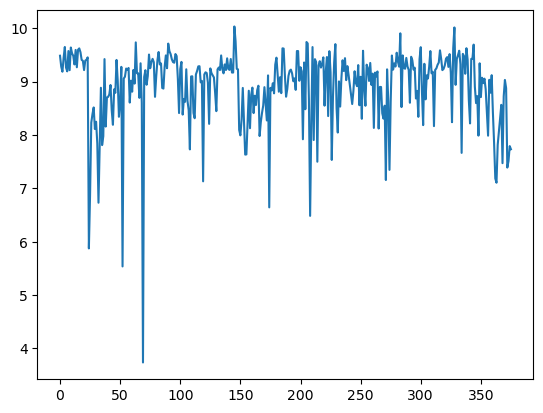

In [49]:
plt.plot(data1)

In [50]:
data_log_dif = data1 - data1.shift()

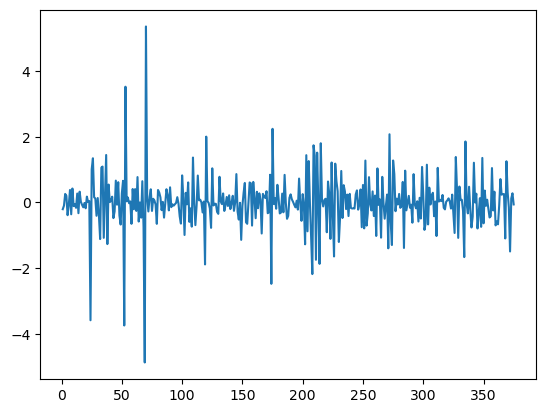

In [51]:
plt.plot(data_log_dif)

In [52]:
from statsmodels.tsa.arima.model import ARIMA
m1=ARIMA(data1,order=(0,8,2))
result2=m1.fit()

D:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


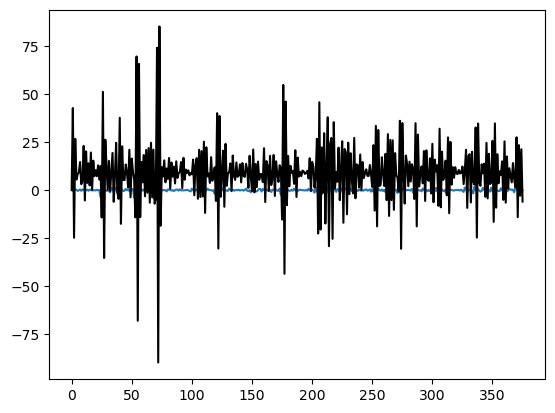

In [53]:
plt.figure()
plt.plot(data_log_dif)
plt.plot(result2.fittedvalues,color='black')

In [54]:
forecast_steps = 10
forecast1 = result2.forecast(steps=forecast_steps)

print('Forecasted Values:')
print(forecast1)



Forecasted Values:
376       13.199114
377       41.862974
378      128.748166
379      331.878663
380      738.068136
381     1468.874038
382     2686.743349
383     4601.376670
384     7476.337314
385    11635.932053
Name: predicted_mean, dtype: float64


In [55]:
data2 = np.log(FitBit['TotalMinutesAsleep'])

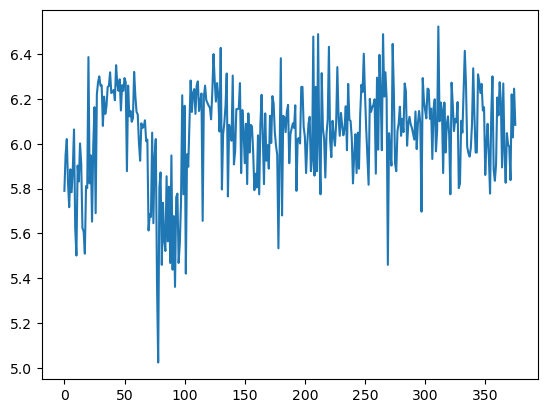

In [56]:
plt.plot(data2)

In [57]:
data_log_diff = data2 - data2.shift()

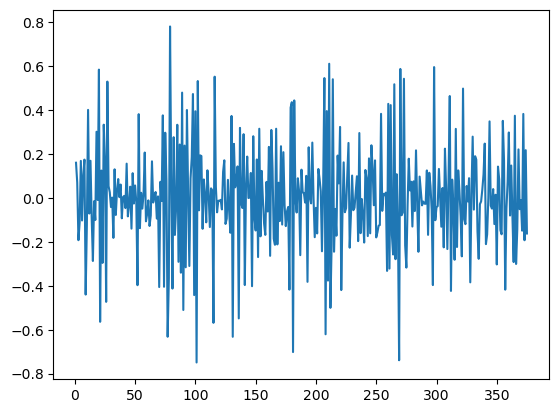

In [58]:
plt.plot(data_log_diff)

In [59]:
from statsmodels.tsa.arima.model import ARIMA
m2=ARIMA(data2,order=(0,10,2))
result3=m2.fit()

D:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


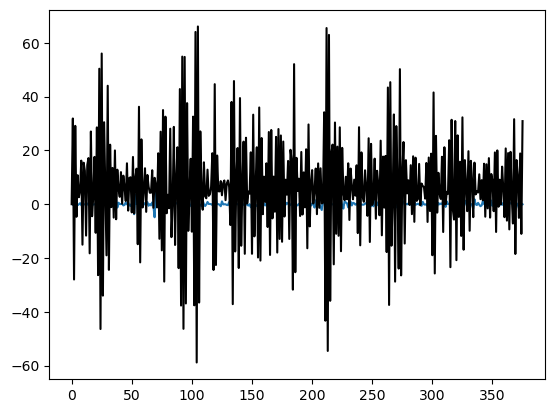

In [60]:
plt.figure()
plt.plot(data_log_dif)
plt.plot(result3.fittedvalues,color='black')

In [61]:
forecast_steps = 10
forecast2 = result3.forecast(steps=forecast_steps)

print('Forecasted Values:')
print(forecast2)



Forecasted Values:
376       -22.973242
377      -199.746693
378      -847.356801
379     -2673.779361
380     -7034.490642
381    -16293.219351
382    -34297.368030
383    -66985.287947
384   -123143.284453
385   -215330.994697
Name: predicted_mean, dtype: float64


# Conclusion:


Utilizing a various range of methodologies and techniques will enhance the precision of outcomes.